In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Data Source

In [2]:
# https://data.gov.au/dataset/ds-dga-5c99cfed-254d-40a6-af1c-47412b7de6fe/details?q=taxstats

#### Data info

##### _Taxation statistics: an overview of the income and tax status of Australian individuals,_ 
##### _companies, partnerships, trusts and funds for 2014-15._

In [3]:
df = pd.read_csv("./dataset/taxstats.csv")

#### Columns

In [4]:
df.columns

Index(['Postcode', 'Count taxable income or loss',
       'Average taxable income or loss', 'Median taxable income or loss',
       'Count salary and wages', 'Average salary and wages',
       'Median salary and wages', 'Count net rent', 'Average net rent',
       'Median net rent', 'Count total income or loss',
       'Average total income or loss', 'Median total income or loss',
       'Count total deductions', 'Average total deductions',
       'Median total deductions', 'Count total business income',
       'Average total business income', 'Median total business income',
       'Count  total business expenses', 'Average total business expenses',
       'Median total business expenses', 'Count net tax', 'Average net tax',
       'Median net tax', 'Count super total accounts balance',
       'Average super total accounts balance',
       'Median super total accounts balance'],
      dtype='object')

In [5]:
df.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


In [6]:
cols = ["Average net tax", "Average total deductions", "Postcode"]

In [7]:
df = df[cols]
df.head()

,Average net tax,Average total deductions,Postcode
0,27555,2071,2000
1,28142,3804,2006
2,15649,1740,2007
3,53976,3917,2008
4,32430,3433,2009


In [8]:
df.shape

(2473, 3)

In [9]:
df.head()

,Average net tax,Average total deductions,Postcode
0,27555,2071,2000
1,28142,3804,2006
2,15649,1740,2007
3,53976,3917,2008
4,32430,3433,2009


#### Clusters

In [10]:
clusters = pd.DataFrame()
clusters["clusters_range"] = range(1, 10)
inertia = []

#### Group by of Average net tax and Average total deductions

In [11]:
X = df[cols]

In [12]:
def find_inertias(cl_range, x):
    "cl: range(int, int), x: pd.DataFrame"
    inertias = []
    for i in cl_range:
        km = KMeans(n_clusters=i, random_state=0).fit(x)
        inertias.append(km.inertia_)
    return inertias

In [13]:
clusters["inertia"] = find_inertias(clusters.clusters_range, X)
clusters

,clusters_range,inertia
0,1,1.641846e+11
1,2,7.206202e+10
2,3,4.254706e+10
3,4,2.799639e+10
4,5,2.124144e+10
5,6,1.695212e+10
6,7,1.422786e+10
7,8,1.270166e+10
8,9,1.140300e+10


#### Inertia

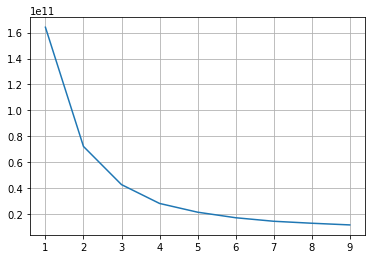

In [14]:
plt.plot(clusters.clusters_range, clusters.inertia)
plt.grid()
plt.show()

##### cluster elbow at 4

In [42]:
kmeans = KMeans(random_state=0, n_clusters=3,  n_init=5).fit(X)
y =  kmeans.predict(X)
df["cluster"] = y

#### Cluster max values

In [50]:
df.pivot_table(values=cols[:2], index="cluster", aggfunc=np.max)

,Average net tax,Average total deductions
cluster,,
0,17017,6780
1,90485,25472
2,33208,8631


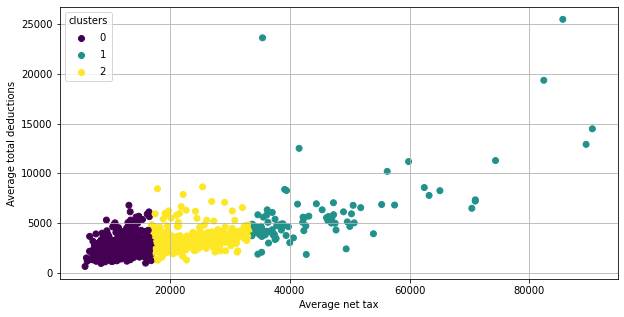

In [44]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

sc = ax.scatter(df[cols[0]], df[cols[1]], c=y)

ax.legend(*sc.legend_elements(), title="clusters", loc=2)
ax.grid()
ax.set_xlabel(f"{cols[0]}")
ax.set_ylabel(f"{cols[1]}")
fig.savefig("./figures/tax_deduction_clusters.png", format="png", dpi=500)

#### Group by Postcodes, Business Income and Expenses

In [18]:
cols2 = ["Average total business income", "Average total business expenses"]

In [19]:
df2 = pd.read_csv("./dataset/taxstats.csv", usecols=cols2)

In [20]:
df2.head()

,Average total business income,Average total business expenses
0,210901,222191
1,69983,48971
2,575099,639499
3,53329,32173
4,237539,222993


In [21]:
X2 = df2[cols2]

In [22]:
clusters["inertia2"] = find_inertias(clusters.clusters_range, X2)
clusters

,clusters_range,inertia,inertia2
0,1,1.641846e+11,1.333516e+13
1,2,7.206202e+10,7.063097e+12
2,3,4.254706e+10,3.718740e+12
3,4,2.799639e+10,2.341856e+12
4,5,2.124144e+10,1.714920e+12
5,6,1.695212e+10,1.224488e+12
6,7,1.422786e+10,9.444748e+11
7,8,1.270166e+10,7.488375e+11
8,9,1.140300e+10,6.346163e+11


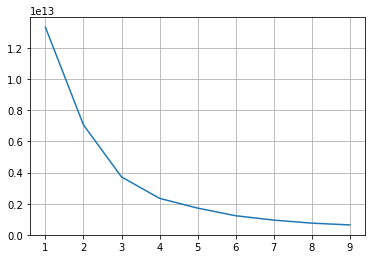

In [23]:
plt.plot(clusters.clusters_range, clusters.inertia2)
plt.grid()
plt.show()

##### cluster elbow at 4

In [37]:
kmeans2 = KMeans(n_clusters=3, random_state=1, n_init=5).fit(X2)

In [38]:
y2 = kmeans2.predict(X2)

In [39]:
df2["cluster"] = y2

#### Cluster max values

In [48]:
df2.pivot_table(values=cols2, index="cluster", aggfunc=np.max)

,Average total business expenses,Average total business income
cluster,,
0,119125,146493
1,884659,876324
2,327217,357040


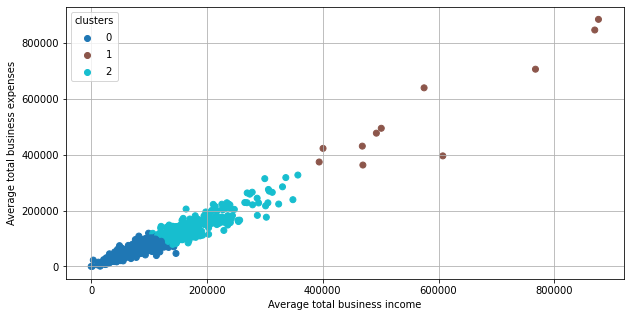

In [41]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

sc = ax.scatter(df2[cols2[0]], df2[cols2[1]], c=y2, cmap="tab10")

ax.legend(*sc.legend_elements(), title="clusters", loc=2)
ax.grid()
ax.set_xlabel(f"{cols2[0]}")
ax.set_ylabel(f"{cols2[1]}")
fig.savefig("./figures/expenses_income_clusters.png", format="png", dpi=500)